In [1]:
#   - Importing the required libraries   - 

import pandas as pd

import collections

import networkx as nx
G=nx.Graph()

from pyvis.network import Network

import matplotlib.pyplot as plt

import itertools

from tabulate import tabulate

from datetime import date
today = date.today()

print(today)

2021-06-22


<span style='background :blue' > # CUNY SPS DATA 620

<span style='background :blue' >## WEEK 2 ASSIGNMENT 1
    
### This assignment is about the Enron Email dataset, the dataset contains > 370K edges, we will work with various subsets of those edges.

### The dataset was sourced from https://snap.stanford.edu/data/email-Enron.html

<span style='background :blue' >### This work is a group effort, the group members are Ramnivas Singh, Deepak Sharma, Tage Singh,

<span style='background :green' > ## The cell below provide an overview of **10,000** records of the ENRON Email dataset 

In [2]:
# The follwoing will import all records into the networkx object

#  - importing all records from dataset

data_1000 = pd.read_csv('enron_import_10000_records.csv')
data_all = pd.read_csv('enron_import_all_records.csv')

G=nx.from_pandas_edgelist(data_1000, 'Source', 'Target',edge_attr=None)
GA=nx.from_pandas_edgelist(data_all, 'Source', 'Target',edge_attr=None)

#   - Trimming nodes with 1 connection   - 

G1=G.copy()

to_be_removed = [x for  x in G1.nodes() if G1.degree(x) <= 1]

for x in to_be_removed:
    G1.remove_node(x)
    
#   - Trimming nodes with 5 or less connections   - 
    
G5=G.copy()

to_be_removed = [x for  x in G5.nodes() if G5.degree(x) <= 5]

for x in to_be_removed:
    G5.remove_node(x)



<span style='background :green' > ## The cell below provide an overview of **100,000** records of the ENRON Email dataset 
    
<span style='background :red' > ## This subset of the data is too large to generate a graph using current hardware config

The numbr of NODES in the base data of 10,000 records 4692


A summary NODES in the base data of 10,000 records Name: 
Type: Graph
Number of nodes: 4692
Number of edges: 9402
Average degree:   4.0077


The RADIUS of the base data of 10,000 records 3


The DIAMETER of the base data of 10,000 records 5




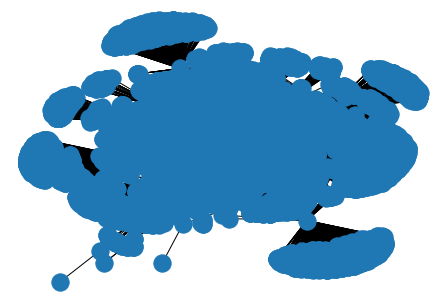

In [3]:
print("The numbr of NODES in the base data of 10,000 records",len(G))

print("\n")

print("A summary NODES in the base data of 10,000 records",nx.info(G))


print("\n")

print("The RADIUS of the base data of 10,000 records",nx.radius(G))


print("\n")

print("The DIAMETER of the base data of 10,000 records",nx.diameter(G))


print("\n")
    
nx.draw(G)

In [4]:
# DEGREE CENTRALITY

print(" ---- For 10,000 Records  - Degree Centrality ----")

print("\n")

dc_g = (sorted(G.degree, key=lambda x: x[1], reverse=True))
sort_dc_g=(dc_g[0:9])

for i in sort_dc_g:
    print(i[0], i[1])
    
 

 ---- For 10,000 Records  - Degree Centrality ----


eid-76 815
eid-95 597
eid-127 481
eid-93 455
eid-106 422
eid-72 377
eid-90 366
eid-78 339
eid-109 339


In [5]:
# CLOSENESS CENTRALITY 

print(" ---- For 10,000 Records  - Closeness Centraility")

print("\n")

cc_g=nx.closeness_centrality(G)

sort_cc_g = sorted(cc_g.items(), key=lambda x: x[1], reverse=True)

sort_cc_g=(sort_cc_g[0:9])

for i in sort_cc_g:
    print(i[0], i[1])
    
    
print("\n")


 ---- For 10,000 Records  - Closeness Centraility


eid-54 0.4907417093838268
eid-76 0.48768063208233703
eid-83 0.47484563214900294
eid-56 0.47046434660515496
eid-106 0.45636735090962155
eid-78 0.44718779790276453
eid-155 0.44646426192062433
eid-88 0.4439292135894767
eid-326 0.44084202612536416




In [6]:
# BETWEENESS CENTRALITY

print(" ---- FOR 10,000 Records  - Betweeness Centraility ---- ")

print("\n")

bc_gg = nx.betweenness_centrality(G)

sort_bc_gg = sorted(bc_gg.items(), key=lambda x: x[1], reverse=True)

sort_bc_gg=(sort_bc_gg[0:9])

for i in sort_bc_gg:
    print(i[0], i[1])
    


 ---- FOR 10,000 Records  - Betweeness Centraility ---- 


eid-76 0.21101674708473397
eid-95 0.18343381202209572
eid-127 0.14268163878489784
eid-72 0.09330415940042035
eid-90 0.09176319491309244
eid-106 0.08864564974414015
eid-93 0.08717386392265201
eid-114 0.0837408655052786
eid-78 0.06656660485419798


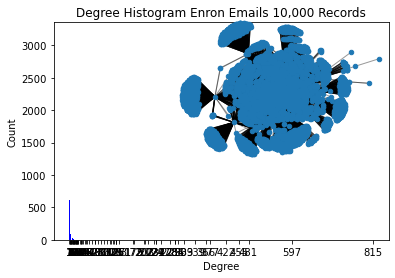

THE END OF CODE


In [7]:
##---------------------------THIS IS FOR GRAPHING THE DEGREE CENTRALITY-------------------------------------

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram Enron Emails 10,000 Records")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset ------- CAN be included in project
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

##------------------------------------------------------------
print('THE END OF CODE')

In [8]:
# this is a sample visualization for the ENRON email dataset using PYVIS and 5000 Records

got_net = Network(height='750px', width='100%', bgcolor='#034C03', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()

data_1K = pd.read_csv('enron_import_5000_records.csv')

sources = data_1K['Source']
targets = data_1K['Target']
weights = data_1K['Weight']


edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('enron_5000_records.html')


In [9]:
print("#####   -----   THE FOLLOWING RELATE TO THE ENRON 10,000 RECORDS DATASET WITH NODES <=1 DEGREE  REMOVED   -----     #####")

#####   -----   THE FOLLOWING RELATE TO THE ENRON 10,000 RECORDS DATASET WITH NODES <=1 DEGREE  REMOVED   -----     #####


In [10]:
# DEGREE CENTRALITY

print(" ---- FOR G1  - Degree Centrality - DEGREE > 1 Only ----")

print("\n")

dc_g1 = (sorted(G1.degree, key=lambda x: x[1], reverse=True))
sort_dc_g1=(dc_g1[0:9])

for i in sort_dc_g1:
    print(i[0], i[1])
    
 

 ---- FOR G1  - Degree Centrality - DEGREE > 1 Only ----


eid-76 517
eid-93 316
eid-106 293
eid-109 262
eid-56 253
eid-78 251
eid-74 243
eid-88 225
eid-75 209


In [11]:
# CLOSENESS CENTRALITY 

print(" ---- FOR G1  - Closeness Centraility - DEGREE > 1 Only")

print("\n")

cc_g1=nx.closeness_centrality(G1)

sort_cc_g1 = sorted(cc_g1.items(), key=lambda x: x[1], reverse=True)

sort_cc_g1=(sort_cc_g1[0:9])

for i in sort_cc_g1:
    print(i[0], i[1])
    
    
print("\n")


 ---- FOR G1  - Closeness Centraility - DEGREE > 1 Only


eid-76 0.5826833073322933
eid-56 0.5403254972875225
eid-106 0.5360602798708288
eid-93 0.5305397727272727
eid-109 0.5242105263157895
eid-74 0.519471488178025
eid-78 0.5162404975812025
eid-83 0.5157059026579219
eid-88 0.5105946684894054




In [12]:
# BETWEENESS CENTRALITY
print(" ---- FOR G1  - Betweeness Centraility - DEGREE > 1 Only")

print("\n")

bc_gg1 = nx.betweenness_centrality(G1)

sort_bc_gg1 = sorted(bc_gg1.items(), key=lambda x: x[1], reverse=True)

sort_bc_gg1=(sort_bc_gg1[0:9])

for i in sort_bc_gg1:
    print(i[0], i[1])
    


 ---- FOR G1  - Betweeness Centraility - DEGREE > 1 Only


eid-76 0.2402514321129967
eid-109 0.09511948550214953
eid-106 0.09358142236759642
eid-93 0.0919541590048985
eid-56 0.07894011538203861
eid-78 0.06825974914108791
eid-74 0.06433435056382462
eid-88 0.06330204476787733
eid-127 0.049160538404933


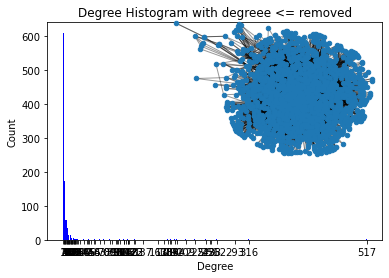

THE END OF CODE


In [13]:
##---------------------------THIS IS FOR GRAPHING THE DEGREE CENTRALITY-------------------------------------

degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram with degreee <= removed")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset ------- CAN be included in project
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G1.subgraph(sorted(nx.connected_components(G1), key=len, reverse=True)[0])
pos = nx.spring_layout(G1)
plt.axis("off")
nx.draw_networkx_nodes(G1, pos, node_size=20)
nx.draw_networkx_edges(G1, pos, alpha=0.4)
plt.show()

##------------------------------------------------------------
print('THE END OF CODE')

In [14]:
got_net = Network(height='750px', width='100%', bgcolor='#034C03', font_color='white')

# set the physics layout of the network
got_net.barnes_hut()

data_1K = pd.read_csv('enron_import_10000_records.csv')

sources = data_1K['Source']
targets = data_1K['Target']
weights = data_1K['Weight']


edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('enron_10000_records.html')


In [15]:
print("#####   -----   THE FOLLOWING RELATE TO ALL RECORDS OF THE  ENRON DATASET WITH LIMITED VISUALIZATIONS   -----     #####")

NameError: name 'Print' is not defined

In [ ]:
print("The numbr of NODES in the ENRON DATASET -ALL RECORDS - )",len(GA))

print("\n")

print("A summary NODES in the ENRON DATASET -ALL RECORDS - ",nx.info(GA))


print("\n")

print("The RADIUS of the ENRON DATASET -ALL RECORDS - ",nx.radius(GA))


print("\n")

print("The DIAMETER of the ENRON DATASET -ALL RECORDS - ",nx.diameter(GA))


print("\n")
    
nx.draw(G)

In [ ]:
# DEGREE CENTRALITY

print(" ---- For All Records - Degree Centrality ----")

print("\n")

dc_ga = (sorted(GA.degree, key=lambda x: x[1], reverse=True))
sort_dc_ga=(dc_ga[0:9])

for i in sort_dc_ga:
    print(i[0], i[1])
    
 

In [ ]:
# CLOSENESS CENTRALITY 

print(" ---- For All Records  - Closeness Centraility")

print("\n")

cc_ga=nx.closeness_centrality(GA)

sort_cc_ga = sorted(cc_ga.items(), key=lambda x: x[1], reverse=True)

sort_cc_ga=(sort_cc_ga[0:9])

for i in sort_cc_ga:
    print(i[0], i[1])
    
    
print("\n")


In [ ]:
# BETWEENESS CENTRALITY

print(" ---- For All Records  - Betweeness Centraility ---- ")

print("\n")

bc_gga = nx.betweenness_centrality(GA)

sort_bc_gga = sorted(bc_gga.items(), key=lambda x: x[1], reverse=True)

sort_bc_gga=(sort_bc_gga[0:9])

for i in sort_bc_gga:
    print(i[0], i[1])
    


In [ ]:
##---------------------------THIS IS FOR GRAPHING THE DEGREE CENTRALITY-------------------------------------

degree_sequence = sorted([d for n, d in GA.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram ENRON DATASET ALL RECORDS")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset ------- CAN be included in project
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = GA.subgraph(sorted(nx.connected_components(GA), key=len, reverse=True)[0])
pos = nx.spring_layout(GA)
plt.axis("off")
nx.draw_networkx_nodes(GA, pos, node_size=20)
nx.draw_networkx_edges(GA, pos, alpha=0.4)
plt.show()

##------------------------------------------------------------
print('THE END OF CODE')